<a href="https://colab.research.google.com/github/thea725/orbit-archive/blob/main/notebook/Decision_Tree_dan_Agglomerative_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [17]:
pima = pd.read_csv("https://raw.githubusercontent.com/thea725/orbit-archive/main/datasets/diabetes_latih.csv")
pima

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,8,188,78,0,0,47.9,0.137,43,1
1,7,152,88,44,0,50.0,0.337,36,1
2,2,99,52,15,94,24.6,0.637,21,0
3,1,109,56,21,135,25.2,0.833,23,0
4,2,88,74,19,53,29.0,0.229,22,0
...,...,...,...,...,...,...,...,...,...
609,10,101,76,48,180,32.9,0.171,63,0
610,2,122,70,27,0,36.8,0.340,27,0
611,5,121,72,23,112,26.2,0.245,30,0
612,1,126,60,0,0,30.1,0.349,47,1


In [18]:
pima.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [19]:
x = pima.iloc[:, :8] #mengambil kolom dari index nol hingga 8
y = pima.iloc[:, 8] #mengambil nilai dari kolom berindex 8
print(x, y)

     Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age
0              8      188             78  ...  47.9                     0.137   43
1              7      152             88  ...  50.0                     0.337   36
2              2       99             52  ...  24.6                     0.637   21
3              1      109             56  ...  25.2                     0.833   23
4              2       88             74  ...  29.0                     0.229   22
..           ...      ...            ...  ...   ...                       ...  ...
609           10      101             76  ...  32.9                     0.171   63
610            2      122             70  ...  36.8                     0.340   27
611            5      121             72  ...  26.2                     0.245   30
612            1      126             60  ...  30.1                     0.349   47
613            1       93             70  ...  30.4                     0.315   23

[61

In [20]:
#membagi dataset ke train data dan test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) #0.2 itu 20% sebagai test sisanya 80% buat train

# Membuat Model

In [21]:
clf = DecisionTreeClassifier()

clf = clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

In [22]:
print("Akurasi: ", metrics.accuracy_score(y_test, y_pred)*100, "%")

Akurasi:  71.54471544715447 %


# Ngegambar Decision Tree

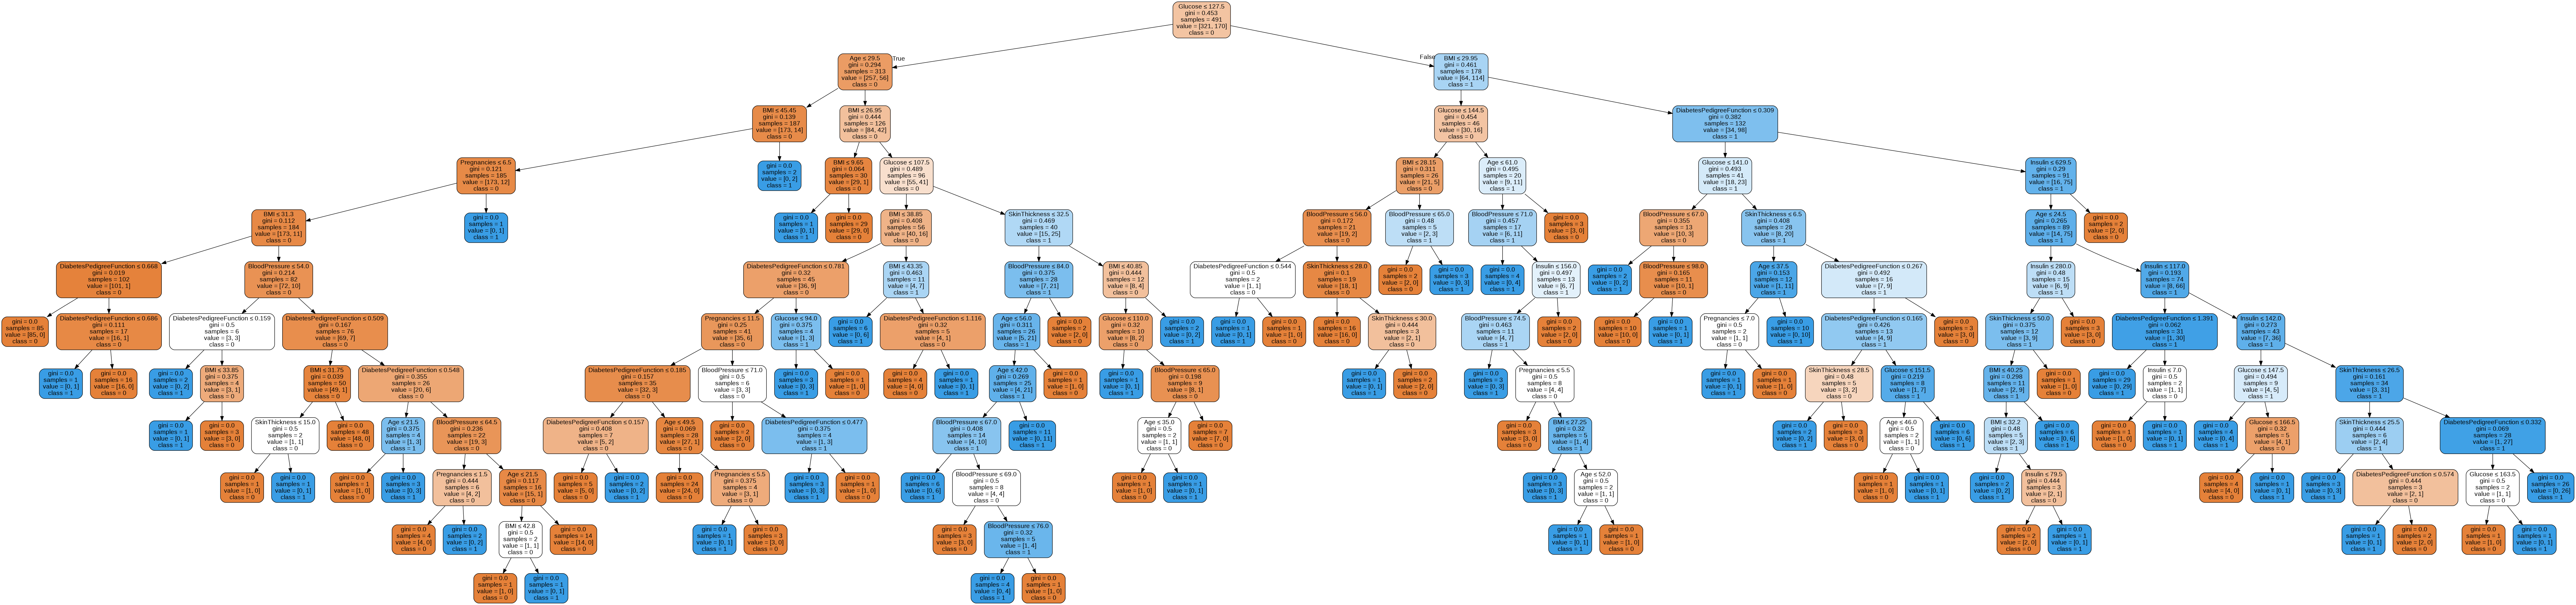

In [24]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=feature_cols, class_names=['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("diabetes.png")
Image(graph.create_png())

# Agglomerative Clustering

In [31]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch

In [32]:
data = pd.read_csv('https://raw.githubusercontent.com/thea725/orbit-archive/main/datasets/Mall_Customers.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [40]:
X = data.iloc[:, [3, 4]].values #mengambil nilai pada index 3 dan 4 seperti iloc yang ada di atas
#print(X) #buat liat data yang muncul

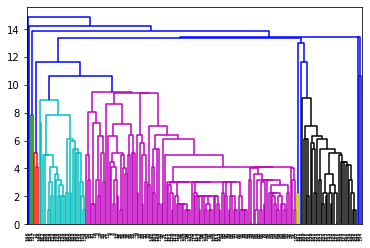

In [41]:
dendrogram = sch.dendrogram(sch.linkage(X, method='single')) #membuat dendogram

In [47]:
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='average') #n_cluster itu buat membagi kluster ke n jenis coba ubah liat efek di gambar bawah
model.fit(X)
labels = model.labels_
labels

array([1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 4, 0, 4,
       0, 4])

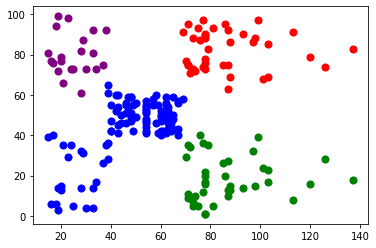

In [46]:
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')
plt.scatter(X[labels==3, 0], X[labels==3, 1], s=50, marker='o', color='purple')
plt.scatter(X[labels==4, 0], X[labels==4, 1], s=50, marker='o', color='orange')
plt.show()

In [48]:
score = silhouette_score(X, labels, metric='euclidean')
score

0.4791911539647448

In [49]:
len(X)

200

In [50]:
# Mencari Metode Linkage terbaik
score=[]
linkages = ['complete', 'single', 'average']
for linkage in linkages:
  model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage=linkage)
  model.fit(X)
  labels = model.labels_
  score.append(silhouette_score(X, labels, metric='euclidean'))

print(score)
print("Nilai Silhouette Score Terbaik : ", max(score), "\nMenggunakan Metode = ", linkages[score.index(max(score))])

[0.5529945955148897, 0.2694896445402342, 0.4791911539647448]
Nilai Silhouette Score Terbaik :  0.5529945955148897 
Menggunakan Metode =  complete


In [51]:
# Mencari Jumlah Cluster terbaik
score=[]
for i in range(2, 6):
  model = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='complete')
  model.fit(X)
  labels = model.labels_
  score.append(silhouette_score(X, labels, metric='euclidean'))

print(score)
print("Nilai Silhouette Score Terbaik : ", max(score), "\nKetika Cluster = ", score.index(max(score))+2)

[0.36706444723912895, 0.4618340266628975, 0.4916598193892782, 0.5529945955148897]
Nilai Silhouette Score Terbaik :  0.5529945955148897 
Ketika Cluster =  5
